<a href="https://colab.research.google.com/github/Gopinath1911/Reddit_Scores_Prediction/blob/main/Reddit_Score_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import pandas as pd
import numpy as np

df=pd.read_csv("/content/drive/MyDrive/data.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.head()

,Unnamed: 0,gilded,author_flair_css_class,id,link_id,downs,subreddit,author,score,subreddit_id,ups,edited,author_flair_text,body,retrieved_on,parent_id,controversiality,name,score_hidden,distinguished,archived,created_utc,removal_reason
0,0,0,NaN,2,t3_7j6z5,0,politics,malcontent,1,t5_2cneq,1,0,NaN,&gt;The business cannot survive paying out ben...,1428217153,t1_c06vdmu,0,t1_2,False,NaN,True,1229580037,NaN
1,1,0,NaN,3,t3_7jlvw,0,politics,malcontent,1,t5_2cneq,1,0,NaN,"&gt;I'm curious, how do you see, beyond defini...",1428217153,t1_c06vcxp,0,t1_3,False,NaN,True,1229580041,NaN
2,2,0,NaN,4,t3_7jlvw,0,politics,malcontent,2,t5_2cneq,2,0,NaN,"&gt;I'm curious, how do you see, beyond defini...",1428217153,t1_c06vcxp,0,t1_4,False,NaN,True,1229580053,NaN
3,3,0,NaN,5,t3_7k65l,0,WTF,[deleted],1,t5_2qh61,1,0,NaN,[deleted],1428217153,t1_c06vuga,0,t1_5,False,NaN,True,1229580067,NaN
4,4,0,NaN,6,t3_7k97q,0,reddit.com,[deleted],1,t5_6,1,0,NaN,[deleted],1428217153,t3_7k97q,0,t1_6,False,NaN,True,1229580072,NaN


In [ ]:
df.shape

(850359, 23)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850359 entries, 0 to 850358
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              850359 non-null  int64  
 1   gilded                  850359 non-null  int64  
 2   author_flair_css_class  4431 non-null    object 
 3   id                      850358 non-null  object 
 4   link_id                 850359 non-null  object 
 5   downs                   850359 non-null  int64  
 6   subreddit               850359 non-null  object 
 7   author                  850359 non-null  object 
 8   score                   850359 non-null  int64  
 9   subreddit_id            850359 non-null  object 
 10  ups                     850359 non-null  int64  
 11  edited                  850359 non-null  int64  
 12  author_flair_text       3916 non-null    object 
 13  body                    850357 non-null  object 
 14  retrieved_on        

In [ ]:
df.isna().sum()

Unnamed: 0                     0
gilded                         0
author_flair_css_class    845928
id                             1
link_id                        0
downs                          0
subreddit                      0
author                         0
score                          0
subreddit_id                   0
ups                            0
edited                         0
author_flair_text         846443
body                           2
retrieved_on                   0
parent_id                      0
controversiality               0
name                           0
score_hidden                   0
distinguished             850357
archived                       0
created_utc                    0
removal_reason            850359
dtype: int64

In [ ]:
df.nunique()

Unnamed: 0                850359
gilded                         1
author_flair_css_class       314
id                        850358
link_id                   110898
downs                          1
subreddit                   1103
author                     34073
score                        493
subreddit_id                1103
ups                          493
edited                       670
author_flair_text            460
body                      692282
retrieved_on                7427
parent_id                 443336
controversiality               2
name                      850359
score_hidden                   1
distinguished                  1
archived                       2
created_utc               714831
removal_reason                 0
dtype: int64

In [ ]:
df=df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [ ]:
df.drop(['gilded','downs', 'ups', 'controversiality', 'score_hidden', 'distinguished','removal_reason'], axis=1, inplace=True)

In [ ]:
df.head().T

,0,1,2,3,4
author_flair_css_class,NaN,NaN,NaN,NaN,NaN
id,2,3,4,5,6
link_id,t3_7j6z5,t3_7jlvw,t3_7jlvw,t3_7k65l,t3_7k97q
subreddit,politics,politics,politics,WTF,reddit.com
author,malcontent,malcontent,malcontent,[deleted],[deleted]
score,1,1,2,1,1
subreddit_id,t5_2cneq,t5_2cneq,t5_2cneq,t5_2qh61,t5_6
edited,0,0,0,0,0
author_flair_text,NaN,NaN,NaN,NaN,NaN
body,&gt;The business cannot survive paying out ben...,"&gt;I'm curious, how do you see, beyond defini...","&gt;I'm curious, how do you see, beyond defini...",[deleted],[deleted]


In [ ]:
df.edited.value_counts()

0             736259
1             113429
1369518126         2
1369519786         2
1369507932         2
               ...  
1369517842         1
1367605687         1
1369536792         1
1414164088         1
1418074161         1
Name: edited, Length: 670, dtype: int64

In [ ]:
(df['author'].value_counts()<2).sum()

11870

In [ ]:
df.shape

(850359, 15)

In [ ]:
df = df[df.body != '[deleted]']
df = df[df.author != '[deleted]']

In [ ]:
df.shape

(556154, 15)

In [ ]:
df.head().T

,0,1,2,5,6
author_flair_css_class,NaN,NaN,NaN,NaN,NaN
id,2,3,4,7,8
link_id,t3_7j6z5,t3_7jlvw,t3_7jlvw,t3_7k6s5,t3_7k4fi
subreddit,politics,politics,politics,atheism,programming
author,malcontent,malcontent,malcontent,catalytica,jz_
score,1,1,2,0,2
subreddit_id,t5_2cneq,t5_2cneq,t5_2cneq,t5_2qh2p,t5_2fwo
edited,0,0,0,0,0
author_flair_text,NaN,NaN,NaN,NaN,NaN
body,&gt;The business cannot survive paying out ben...,"&gt;I'm curious, how do you see, beyond defini...","&gt;I'm curious, how do you see, beyond defini...",The greatest historic instigator of human divi...,Looking forward to\n\n* writing more tests for...


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
sub=pd.DataFrame(df.subreddit.value_counts())

In [ ]:
sub[:10]

,subreddit
reddit.com,77196
politics,46220
AskReddit,38989
programming,33758
WTF,33746
pics,32837
worldnews,28773
funny,23904
science,23682
atheism,23024


In [ ]:
subreddit_list=["politics"]
df= df[df.subreddit.isin(subreddit_list)]

In [ ]:
df.shape

(46220, 15)

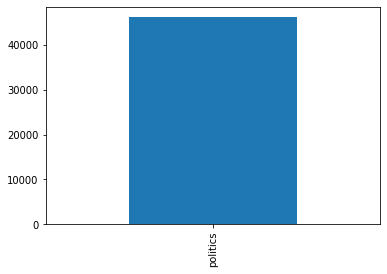

In [ ]:
df.subreddit.value_counts().plot(kind="bar")
plt.show()

In [ ]:
df.head().T

,0,1,2,39,59
author_flair_css_class,NaN,NaN,NaN,NaN,NaN
id,2,3,4,16,1q
link_id,t3_7j6z5,t3_7jlvw,t3_7jlvw,t3_7k6cl,t3_7k8ct
subreddit,politics,politics,politics,politics,politics
author,malcontent,malcontent,malcontent,njharman,ZippyDan
score,1,1,2,4,3
subreddit_id,t5_2cneq,t5_2cneq,t5_2cneq,t5_2cneq,t5_2cneq
edited,0,0,0,0,0
author_flair_text,NaN,NaN,NaN,NaN,NaN
body,&gt;The business cannot survive paying out ben...,"&gt;I'm curious, how do you see, beyond defini...","&gt;I'm curious, how do you see, beyond defini...",Nope. Because we aren't gonna hold them accou...,Or alternative scenario: the opposite of what ...


In [ ]:
t= (df.retrieved_on - df.created_utc) / 60 / 60
t.min()

54536.24083333334

In [ ]:
df.author_flair_css_class.replace(to_replace=np.NAN, value="None", inplace=True)
df.author_flair_text.replace(to_replace=np.NAN, value="None", inplace=True)

In [ ]:
df["time"]= pd.to_datetime(df.created_utc, unit='s')

In [ ]:
df_first_comment = df[['link_id', 'time']].groupby(by=['link_id']).min()

# Create a dictionary of {link_id -> timestamp} pairs
df_first_comment_dict = df_first_comment.to_dict('index')

# Funct that takes in {link_id, timestamp} pair & returns the time elapsed since the first comment in that link_id.
def time_lapse(x):
    return df_first_comment_dict[x]['time']

# Add a column of the time_elapsed from the first comment in a link_id
df['time_lapse'] = df.time - df.link_id.apply(time_lapse)

# Convert the type of time_lapse back to seconds
df.time_lapse = df.time_lapse.apply(lambda x: x.total_seconds())

df['hour_of_comment'] = df.time.apply(lambda x: x.hour)
df['weekday'] = df.time.dt.weekday

In [ ]:
len(df.link_id)/len(df.link_id.unique())

8.589481509013195

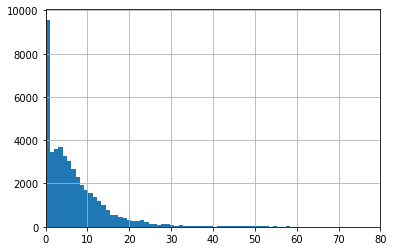

In [ ]:
((df.time_lapse/(60*60)).hist(bins=600).set_xlim(0,80));

In [ ]:
df["is_flair"]= ~df.author_flair_text.apply(lambda x: x is "None")
df["is_flair_css"]= ~df.author_flair_css_class.apply(lambda x: x is "None")

In [ ]:
def pd_to_dict(df, index='', column=''):
    return pd.Series(df[column].values, index=df[index]).to_dict()

comment_to_parent_dict = pd_to_dict(df[['name', 'parent_id']],
                                    index='name', column='parent_id')

def get_depth(x):
    counter = 0
    temp = x
    while True:
        if temp[:3] == 't3_':
            return counter
        try:
            temp = comment_to_parent_dict[temp]
        except KeyError:
            return counter
        counter += 1
        
df['depth'] = df['name'].apply(get_depth)
comment_to_score = pd_to_dict(df[['name', 'score']],
                              index='name', column='score')

def get_parent_score(x):
    try:
        return comment_to_score[x]
    except:
        return np.nan

df['parent_score'] = df.parent_id.apply(lambda x: get_parent_score(x))
# imp_val = df.parent_score.median()
# df.parent_score.fillna(imp_val, inplace=True)

comment_to_time = pd_to_dict(df[['name', 'time']],
                              index='name', column='time')

def get_time_since_parent(pi):
    try:
        return comment_to_time[pi]
    except:
        return np.nan

df['time_since_parent'] = df.parent_id.apply(get_time_since_parent)
df.loc[df.time_since_parent.isna(), 'time_since_parent'] = df.time
df.time_since_parent = df.time - df.time_since_parent
df.time_since_parent = df.time_since_parent.apply(lambda x: x.total_seconds())

In [ ]:
sum(df.parent_score != df.parent_score) / len(df.parent_score)

0.54524015577672

In [ ]:
def get_comment_tree_root(x):
    if comment_to_parent_dict[x][:3] == 't3_':
        return x
    try:
        return get_comment_tree_root(comment_to_parent_dict[x])
    except KeyError:
        return np.nan
    
comment_to_time = pd_to_dict(df[['name', 'time']],
                              index='name', column='time')

def get_time(x):
    try:
        return comment_to_time[x]
    except:
        return np.nan
    
df['comment_tree_root_id'] = df.name.apply(get_comment_tree_root)
df['comment_tree_root_score'] = df.comment_tree_root_id.apply(lambda x: get_parent_score(x))
df['time_since_comment_tree_root'] = df.time - df.comment_tree_root_id.apply(get_time)
df.time_since_comment_tree_root = df.time_since_comment_tree_root.apply(lambda x: x.total_seconds())

In [ ]:
print(sum(df.comment_tree_root_id == df.name) / len(df.depth))

0.3723063608827347


In [ ]:
df.isna().sum()

author_flair_css_class              0
id                                  0
link_id                             0
subreddit                           0
author                              0
score                               0
subreddit_id                        0
edited                              0
author_flair_text                   0
body                                0
retrieved_on                        0
parent_id                           0
name                                0
archived                            0
created_utc                         0
time                                0
time_lapse                          0
hour_of_comment                     0
weekday                             0
is_flair                            0
is_flair_css                        0
depth                               0
parent_score                    25201
time_since_parent                   0
comment_tree_root_id            13125
comment_tree_root_score         13125
time_since_c

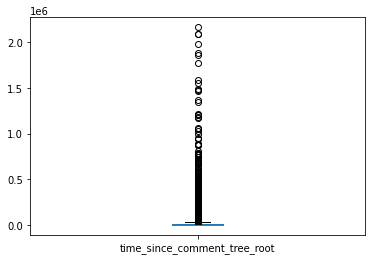

In [ ]:
df["time_since_comment_tree_root"].plot(kind="box")
 

In [ ]:
df["parent_score"] = df.parent_score.transform(lambda x : x.fillna(x.median()))
df["comment_tree_root_score"] = df.comment_tree_root_score.transform(lambda x : x.fillna(x.median()))
df["time_since_comment_tree_root"] = df.time_since_comment_tree_root.transform(lambda x : x.fillna(x.median()))


In [ ]:
df.head().T

,0,1,2,39,59
author_flair_css_class,None,None,None,None,None
id,2,3,4,16,1q
link_id,t3_7j6z5,t3_7jlvw,t3_7jlvw,t3_7k6cl,t3_7k8ct
subreddit,politics,politics,politics,politics,politics
author,malcontent,malcontent,malcontent,njharman,ZippyDan
score,1,1,2,4,3
subreddit_id,t5_2cneq,t5_2cneq,t5_2cneq,t5_2cneq,t5_2cneq
edited,0,0,0,0,0
author_flair_text,None,None,None,None,None
body,&gt;The business cannot survive paying out ben...,"&gt;I'm curious, how do you see, beyond defini...","&gt;I'm curious, how do you see, beyond defini...",Nope. Because we aren't gonna hold them accou...,Or alternative scenario: the opposite of what ...


In [ ]:
df['word_count']=df['body'].apply(lambda x : len(x.split()))

In [ ]:
df["author"]=df.author.map(df.author.value_counts())

In [ ]:
numeric_cols=["time_lapse", "hour_of_comment", "weekday", "word_count","depth", "parent_score", "time_since_parent", "comment_tree_root_score", "time_since_comment_tree_root"]
cat_cols=["subreddit"]
bool_cols=["is_flair_css", "is_flair", "archived"]

In [ ]:
"""
from sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer

lb = LabelBinarizer()

df["subreddit"]=lb.fit_transform(df.subreddit)
"""

'\nfrom sklearn.preprocessing import LabelBinarizer, MultiLabelBinarizer\n\nlb = LabelBinarizer()\n\ndf["subreddit"]=lb.fit_transform(df.subreddit)\n'

In [ ]:
#df.subreddit.value_counts()

In [ ]:
df["is_flair_css"]=(df["is_flair_css"]).astype('int')
df["is_flair"]=(df["is_flair"]).astype('int')
df["archived"]=(df["archived"]).astype('int')

In [ ]:
df.head().T

,0,1,2,39,59
author_flair_css_class,None,None,None,None,None
id,2,3,4,16,1q
link_id,t3_7j6z5,t3_7jlvw,t3_7jlvw,t3_7k6cl,t3_7k8ct
subreddit,politics,politics,politics,politics,politics
author,272,272,272,22,6
score,1,1,2,4,3
subreddit_id,t5_2cneq,t5_2cneq,t5_2cneq,t5_2cneq,t5_2cneq
edited,0,0,0,0,0
author_flair_text,None,None,None,None,None
body,&gt;The business cannot survive paying out ben...,"&gt;I'm curious, how do you see, beyond defini...","&gt;I'm curious, how do you see, beyond defini...",Nope. Because we aren't gonna hold them accou...,Or alternative scenario: the opposite of what ...


In [ ]:
df.isna().sum()

author_flair_css_class              0
id                                  0
link_id                             0
subreddit                           0
author                              0
score                               0
subreddit_id                        0
edited                              0
author_flair_text                   0
body                                0
retrieved_on                        0
parent_id                           0
name                                0
archived                            0
created_utc                         0
time                                0
time_lapse                          0
hour_of_comment                     0
weekday                             0
is_flair                            0
is_flair_css                        0
depth                               0
parent_score                        0
time_since_parent                   0
comment_tree_root_id            13125
comment_tree_root_score             0
time_since_c

In [ ]:
y = df['score']
x = df[["time_lapse", "hour_of_comment", "weekday", "word_count", "is_flair_css", "is_flair", "archived", "depth", "parent_score", "time_since_parent", "comment_tree_root_score", "time_since_comment_tree_root"]]

In [ ]:
x

,time_lapse,hour_of_comment,weekday,word_count,is_flair_css,is_flair,archived,depth,parent_score,time_since_parent,comment_tree_root_score,time_since_comment_tree_root
0,440878.0,6,3,86,0,0,1,21,0.0,56197.0,2.0,0.0
1,216480.0,6,3,79,0,0,1,12,1.0,59249.0,0.0,212687.0
2,216492.0,6,3,79,0,0,1,12,1.0,59261.0,0.0,212699.0
39,30807.0,6,3,8,0,0,1,1,2.0,0.0,4.0,0.0
59,11319.0,6,3,17,0,0,1,3,4.0,1328.0,4.0,9182.0
...,...,...,...,...,...,...,...,...,...,...,...,...
850259,10322.0,5,3,33,0,0,1,3,2.0,5086.0,-6.0,5809.0
850291,23897.0,5,3,10,0,0,1,2,22.0,12599.0,22.0,12599.0
850297,41700.0,5,3,55,0,0,1,3,2.0,27962.0,9.0,39498.0
850314,440426.0,5,3,12,0,0,1,13,1.0,63189.0,2.0,0.0


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [ ]:
X_train

,time_lapse,hour_of_comment,weekday,word_count,is_flair_css,is_flair,archived,depth,parent_score,time_since_parent,comment_tree_root_score,time_since_comment_tree_root
521949,46920.0,12,5,20,0,0,1,3,8.0,30736.0,89.0,38778.0
56064,0.0,1,5,36,0,0,1,1,2.0,0.0,0.0,0.0
545243,5240.0,16,6,5,0,0,1,1,2.0,0.0,14.0,0.0
143772,41447.0,12,1,12,0,0,1,4,7.0,9537.0,33.0,27118.0
628333,59295.0,14,2,4,0,0,1,1,2.0,0.0,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
723869,41477.0,20,5,33,0,0,1,1,2.0,0.0,2.0,0.0
518401,0.0,6,5,1,0,0,1,1,2.0,0.0,1.0,0.0
535002,37721.0,1,6,33,0,0,1,1,2.0,0.0,3.0,0.0
723906,112213.0,20,5,112,0,0,1,1,2.0,0.0,2.0,0.0


In [ ]:
def model_diagnostics(model):
    y_predicted = model.predict(X_test)
    r2 = r2_score(y_test, y_predicted)
    mse = mean_squared_error(y_test, y_predicted)
    mae = mean_absolute_error(y_test, y_predicted)
    print(f"R-Sq: {r2:.4}")
    print(f"RMSE: {np.sqrt(mse)}")
    print(f"MAE: {mae}")
    
    return [r2,np.sqrt(mse),mae]

In [ ]:
model_performance_dict = dict()


In [ ]:
def y_test_vs_y_predicted(y_test,y_predicted):
    fig, ax = plt.subplots()
    ax.scatter(y_test, y_predicted)
    ax.set_xlabel("Test Scores")
    ax.set_ylim([-75, 1400])
    ax.set_ylabel("Predicted Scores")
    plt.show()

In [ ]:
def get_feature_importance(model):
    X_non_text = pd.get_dummies(df[cat_cols])
    features = numeric_cols + bool_cols + list(X_non_text.columns)

    feature_importance = dict(zip(features, model.feature_importances_))
    for name, importance in sorted(feature_importance.items(), key=lambda x: x[1], reverse=True):
        print(f"{name:<30}: {importance:>6.2%}")
  
    print(f"\nTotal importance: {sum(feature_importance.values()):.2%}")
    return feature_importance

In [ ]:
from sklearn.dummy import DummyRegressor

baseline = DummyRegressor(strategy='mean')
baseline.fit(X_train,y_train)


DummyRegressor(constant=None, quantile=None, strategy='mean')

In [ ]:
model_performance_dict["Baseline"] = model_diagnostics(baseline)

R-Sq: -2.932e-10
RMSE: 9.47607235798776
MAE: 3.6019588928161577


In [ ]:
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [ ]:
linear = LinearRegression()

linear.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model_performance_dict["Linear Regression"] = model_diagnostics(linear)

R-Sq: 0.04479
RMSE: 9.261444156482899
MAE: 3.580483605096624


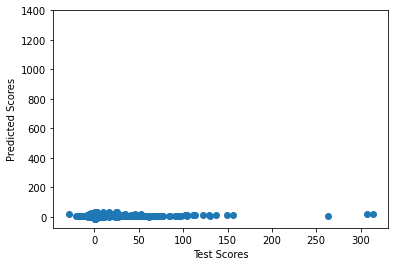

In [ ]:

y_predicted = linear.predict(X_test)
y_test_vs_y_predicted(y_test,y_predicted)

In [ ]:
from sklearn.linear_model import RidgeCV

ridge = RidgeCV(cv=10).fit(X_train, y_train)
ridge.alpha_


10.0

In [ ]:
model_performance_dict["Ridge Regression"] = model_diagnostics(ridge)


R-Sq: 0.04479
RMSE: 9.26144410570833
MAE: 3.580469631947229


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
model_performance_dict["KNN Regression"] = model_diagnostics(knr)


R-Sq: 0.196
RMSE: 8.49685613964936
MAE: 3.2543487667676336


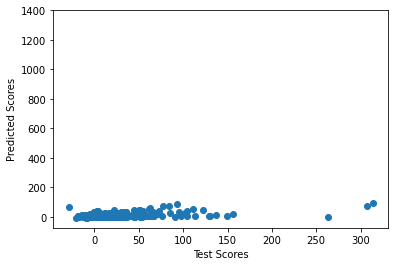

In [ ]:
y_predicted = knr.predict(X_test)
y_test_vs_y_predicted(y_test,y_predicted)


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=70, max_depth=5)
gbr.fit(X_train, y_train)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=5,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=70,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
model_performance_dict["Gradient Boosting Regression"] = model_diagnostics(gbr)


R-Sq: 0.5685
RMSE: 6.224776975990164
MAE: 1.9459818720039812


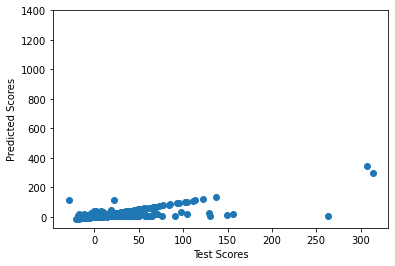

In [ ]:
y_predicted = gbr.predict(X_test)
y_test_vs_y_predicted(y_test,y_predicted)

In [ ]:
import xgboost

xgb = xgboost.XGBRegressor(n_estimators=70, max_depth=5,n_jobs=-1)
xgb.fit(X_train, y_train)


[09:09:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=70,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
model_performance_dict["XG Boosted Regression"] = model_diagnostics(xgb)


R-Sq: 0.5678
RMSE: 6.229942553176812
MAE: 1.9534820434929538


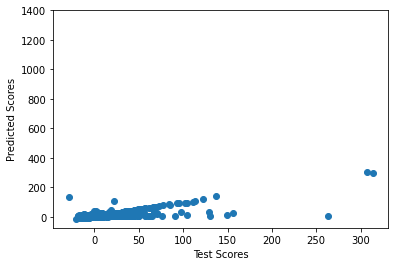

In [ ]:
y_predicted = xgb.predict(X_test)
y_test_vs_y_predicted(y_test,y_predicted)


In [ ]:
xgb_feature_imps = get_feature_importance(xgb)


comment_tree_root_score       : 39.88%
is_flair                      : 27.99%
archived                      : 21.04%
is_flair_css                  :  2.85%
time_since_comment_tree_root  :  2.43%
word_count                    :  2.29%
time_lapse                    :  1.63%
hour_of_comment               :  1.41%
weekday                       :  0.49%
depth                         :  0.00%
parent_score                  :  0.00%
time_since_parent             :  0.00%

Total importance: 100.00%


In [ ]:
results=pd.DataFrame(y_test , y_predicted)

In [ ]:
y_test

562298    -4
255009     1
765454     1
82159      0
170796     1
          ..
109089     2
312221   -11
648040     6
385880     3
357694     6
Name: score, Length: 9244, dtype: int64

In [ ]:
y_predicted

array([-3.4816658 ,  0.5385998 ,  0.96456003, ...,  2.9958682 ,
        4.1538897 ,  5.8377643 ], dtype=float32)